<a href="https://colab.research.google.com/github/Dhruv-Ganapati/Cognifyz-Intern-Projects/blob/main/T1_Predicting_Restaurant_Rating_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


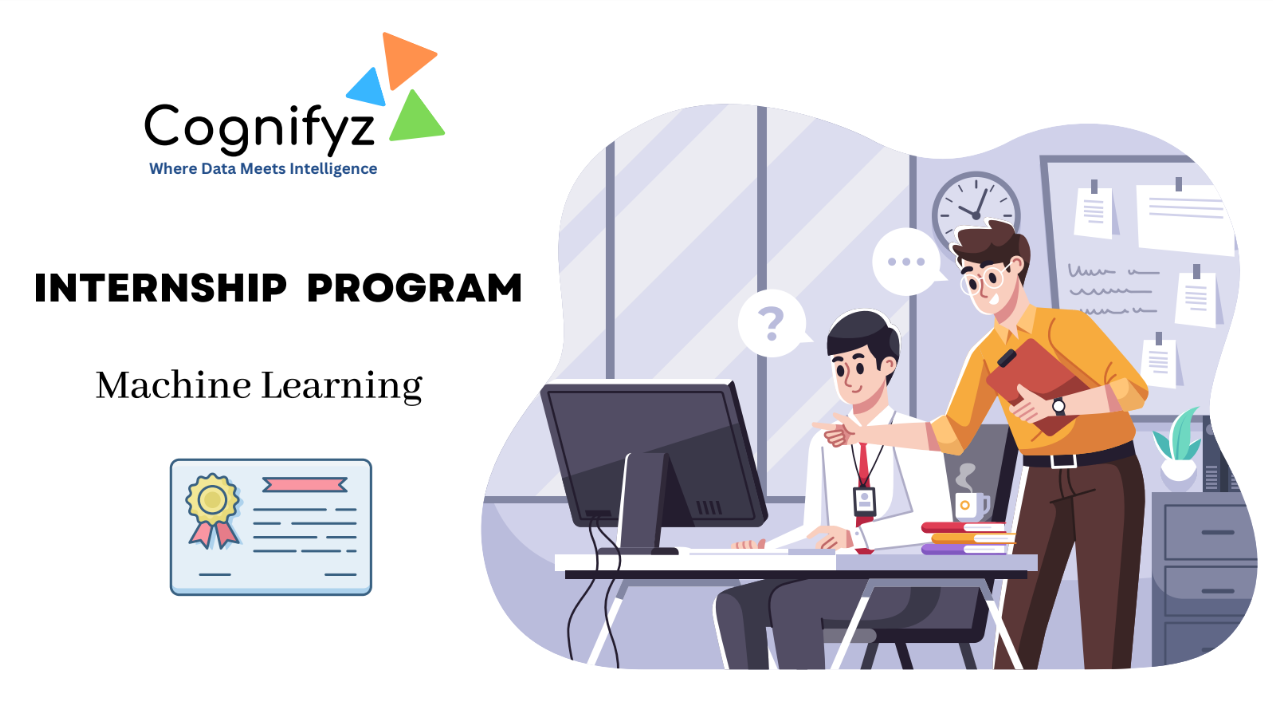

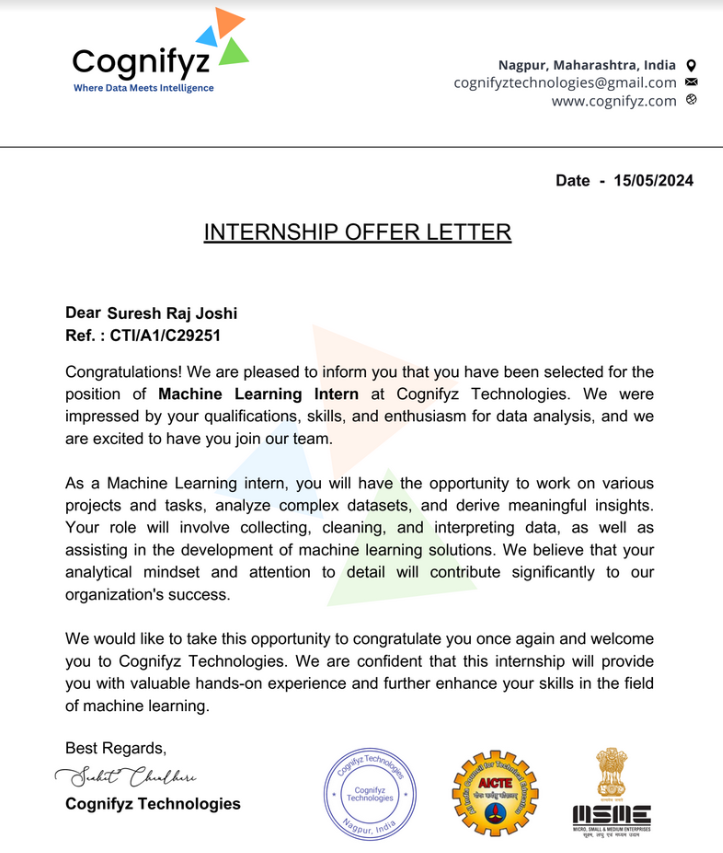


# **|| COGNIFYZ || Task 1**

## Objective: Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

### **Steps:**

- Preprocess the dataset by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.
- Select a regression algorithm (e.g., linear regression, decision tree regression) and train it on the training data.
- Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared) on the testing data.
- Interpret the model's results and analyze the mostinfluential features affecting restaurant ratings.

### **Predicting Restaurant Rating**
* Details about the project is given in this link:
https://drive.google.com/file/d/1Rom7rGmz10GmrVIv833LXwe4E803jSn7/view?usp=sharing

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/AI-Udemy/Cognifyz Internship

/content/drive/MyDrive/Colab Notebooks/AI-Udemy/Cognifyz Internship


**1. Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/AI-Udemy/Cognifyz Internship

import os
directory = '/content/drive/MyDrive/Colab Notebooks/AI-Udemy/Cognifyz Internship'
files = os.listdir(directory)
for file in files:
    print(file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/AI-Udemy/Cognifyz Internship
Dataset .csv
Machine Learning Internship Task .pdf
map_resturant.html
decision_tree
decision_tree.pdf
decision_tree_top_features
decision_tree_top_features.pdf
T4 - Location Based-Analysis.ipynb
T3  Cuisine Classification.ipynb
Task submitted
T1 - Predicting Restaurant Rating .ipynb


**Importing Data file**

In [5]:
df = pd.read_csv('Dataset .csv')

In [6]:
 df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
print("Missing Values:\n\n",df.isnull().sum())

Missing Values:

 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


**Missing Values**

In [10]:
df['Cuisines'].isnull().sum()

9

In [11]:
df = df.dropna()

In [12]:
df['Cuisines'].isnull().sum()

0

*Missing Value Solved by dropping null values.*

In [13]:
df['Aggregate rating'].isnull().sum()

0

In [14]:
df.columns.to_list()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [15]:
# Dropping ID columns- No use in further project
df.drop(columns=['Restaurant ID'], inplace=True)

<ipython-input-15-1a3c8bfd56d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Restaurant ID'], inplace=True)


**Splitting the Data**

In [16]:
# Importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
# Splitting datas into Input= X and Output= y

X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [18]:
ddf = df.drop(['Cuisines'], axis=1)

**ENCODING CATEGORICAL VARIABLES**

In [19]:
# Encoded Datas:

X_encoded = pd.get_dummies(X, drop_first=True)

**TRAINING AND TESTING DATAS**

In [20]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=101)

In [21]:
# Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**MODEL-1: Decision Tree Rrgression Algorithm**

In [22]:
# Using Models:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

model_1 = DecisionTreeRegressor()
model_1.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [23]:
# Predicted Output
y_pred = model_1.predict(X_test_scaled)

In [24]:
# Evaluating Model 1 performance
from sklearn.metrics import mean_squared_error, r2_score

**Evaluating Performance Model**

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
# printing both mse and r2 values
print("Mean Squared Error (MSE): ", mse)
print("R2 Score: ", r2)

Mean Squared Error (MSE):  0.0469195305951383
R2 Score:  0.9798594561802612


**Interpreating Model-1 results**

*Both MSE value = 0.046 and R2 Score = 0.97, which are pretty good output for the model 1 [Decision Tree Regressor]*

**Analysing Most Influential FEATURES affecting resturant rating**

In [27]:
# Feature importance
importances = model_1.feature_importances_



In [28]:
# creating dataframe for Feature Importance
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

*We need to select only few top important features for plotting. The reason is that it will take too much time if we give all the features.*

In [29]:
top_n = 15
top_features = feature_importance_df.head(top_n)

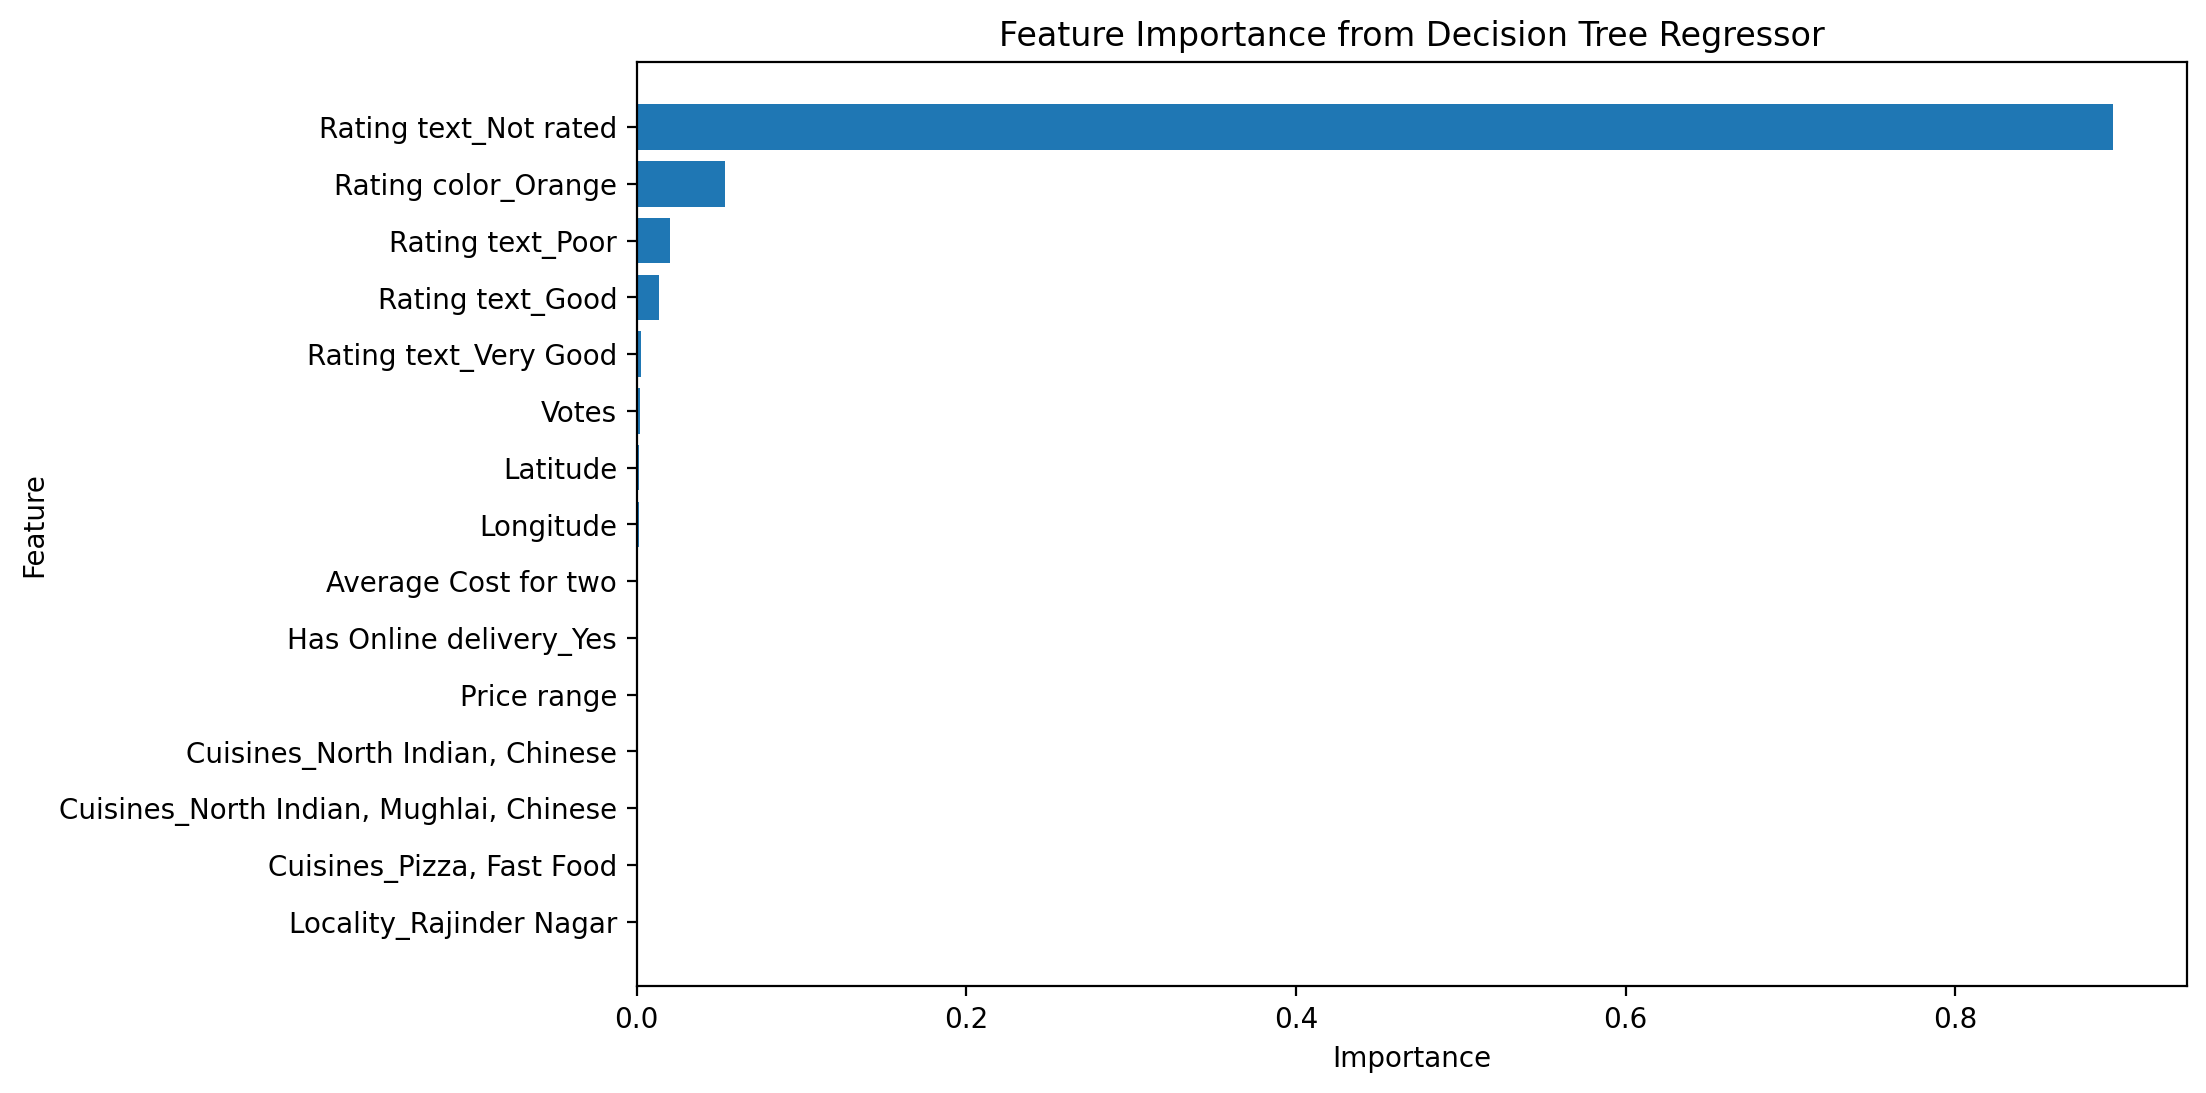

In [30]:
# Plotting the feature importance

plt.figure(figsize=(10, 6), dpi=200)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.title('Feature Importance from Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

*These above shown feature such as:**

* Votes
* Longitude
* Latitude
* Location
* Price
**are the features who affect the rsturant rating:*

In [31]:
feature_importance_df.head(5)

,Feature,Importance
20802,Rating text_Not rated,0.895508
20796,Rating color_Orange,0.053862
20803,Rating text_Poor,0.020345
20801,Rating text_Good,0.013476
20804,Rating text_Very Good,0.002668


In [32]:
# Visualize the Decision Tree
from sklearn.tree import export_graphviz
import graphviz

In [33]:
top_feature = feature_importance_df.head(5)['Feature'].values

In [34]:
top_feature

array(['Rating text_Not rated', 'Rating color_Orange', 'Rating text_Poor',
       'Rating text_Good', 'Rating text_Very Good'], dtype=object)

In [35]:

# Create a new DataFrame with only the top N features
X_top_features = X_encoded[top_feature]

In [36]:
# Split the data into training and testing sets
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_features, y, test_size=0.2, random_state=42)


In [37]:
# Initialize and train the Decision Tree Regressor
tree_regressor_top = DecisionTreeRegressor(random_state=42)
tree_regressor_top.fit(X_train_top, y_train_top)

DecisionTreeRegressor(random_state=42)

In [38]:
# Visualize the Decision Tree
dot_data = export_graphviz(tree_regressor_top, out_file=None,
                           feature_names=top_feature,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_top_features")  # Saves the tree as a file
graph.view()  # Opens the file using the default viewer

'decision_tree_top_features.pdf'

**- These features are listed in the order of their influence, with**

#### Rating color_Orange:
- being the most influential

***Here, We can see pdf of Decision tree and it's top features.***




---
#---------------------------------------------------THE END---------------------------------------------------